In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.806081,2.556055,-0.479716,0.566729,2.562044,0
1,0.319532,1.219250,0.769051,0.620704,1.457296,0
2,1.875155,-0.910777,0.808054,1.477890,-0.502704,1
3,-0.015375,0.517078,4.336521,3.600242,-2.301664,1
4,0.669468,3.236620,1.942427,0.692793,2.906709,0


In [4]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [5]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [6]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [7]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3624\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [8]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3624\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [9]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3624\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [10]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col1', 'col5', 'target'], dtype='object')
Index(['col5', 'col3', 'target'], dtype='object')
Index(['col5', 'col1', 'target'], dtype='object')


In [11]:
df3

,col5,col1,target
33,-2.688011,0.781660,1
21,-0.855632,0.926701,0
94,-0.252382,1.027532,1
81,-1.195548,0.744071,1
78,-0.156607,1.575446,1
84,-2.577933,-1.182576,1
10,2.022705,3.398428,1
41,0.044953,1.311308,0
84,-2.577933,-1.182576,1
75,1.227886,0.052099,0


In [12]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [13]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [14]:
from sklearn.tree import plot_tree

[Text(0.6071428571428571, 0.9166666666666666, 'x[1] <= 0.018\ngini = 0.493\nsamples = 50\nvalue = [22, 28]'),
 Text(0.42857142857142855, 0.75, 'x[0] <= 2.716\ngini = 0.351\nsamples = 22\nvalue = [5, 17]'),
 Text(0.35714285714285715, 0.5833333333333334, 'x[0] <= 1.615\ngini = 0.188\nsamples = 19\nvalue = [2, 17]'),
 Text(0.21428571428571427, 0.4166666666666667, 'x[0] <= 0.977\ngini = 0.117\nsamples = 16\nvalue = [1, 15]'),
 Text(0.14285714285714285, 0.25, 'x[0] <= 0.805\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.21428571428571427, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2857142857142857, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.5, 0.4166666666666667, 'x[0] <= 1.765\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.42857142857142855, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5714285714285714, 0.25, 'gini = 0.0\nsample

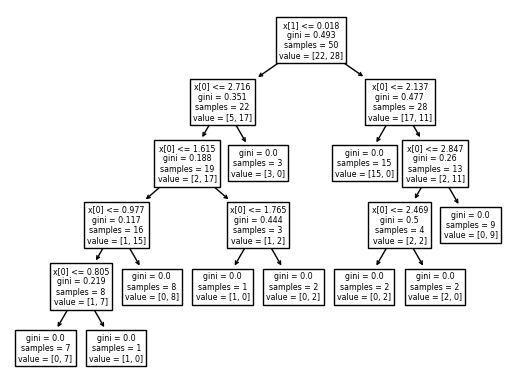

In [15]:
plot_tree(clf1)

[Text(0.43333333333333335, 0.95, 'x[0] <= 1.704\ngini = 0.493\nsamples = 50\nvalue = [22, 28]'),
 Text(0.13333333333333333, 0.85, 'x[0] <= -1.899\ngini = 0.367\nsamples = 33\nvalue = [8, 25]'),
 Text(0.06666666666666667, 0.75, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.2, 0.75, 'x[0] <= -1.715\ngini = 0.463\nsamples = 22\nvalue = [8, 14]'),
 Text(0.13333333333333333, 0.65, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.26666666666666666, 0.65, 'x[0] <= -0.993\ngini = 0.42\nsamples = 20\nvalue = [6, 14]'),
 Text(0.2, 0.55, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.3333333333333333, 0.55, 'x[0] <= -0.894\ngini = 0.48\nsamples = 15\nvalue = [6, 9]'),
 Text(0.26666666666666666, 0.45, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4, 0.45, 'x[1] <= 0.67\ngini = 0.426\nsamples = 13\nvalue = [4, 9]'),
 Text(0.3333333333333333, 0.35, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.4666666666666667, 0.35, 'x[1] <= 2.432\ngini = 0.494\nsamples = 9\nvalue = [4, 

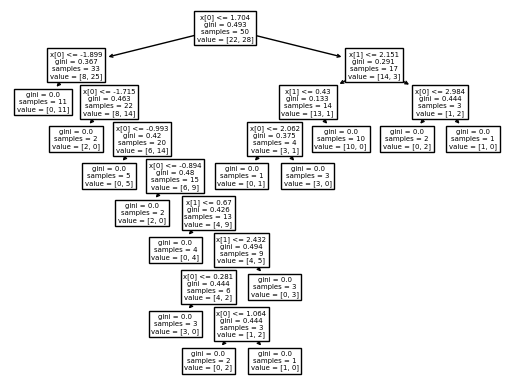

In [16]:
plot_tree(clf2)

[Text(0.5714285714285714, 0.9285714285714286, 'x[0] <= -0.993\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.42857142857142855, 0.7857142857142857, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.7142857142857143, 0.7857142857142857, 'x[1] <= 3.086\ngini = 0.334\nsamples = 33\nvalue = [26, 7]'),
 Text(0.5714285714285714, 0.6428571428571429, 'x[0] <= -0.056\ngini = 0.231\nsamples = 30\nvalue = [26, 4]'),
 Text(0.42857142857142855, 0.5, 'x[0] <= -0.504\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.2857142857142857, 0.35714285714285715, 'x[0] <= -0.845\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.14285714285714285, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.42857142857142855, 0.21428571428571427, 'x[0] <= -0.699\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.2857142857142857, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5714285714285714, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [2,

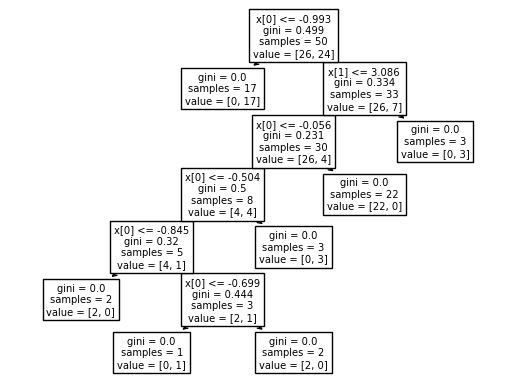

In [17]:
plot_tree(clf3)

In [18]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [19]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [20]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [21]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
87,2.373428,-2.834345,0.263369,2.228019,-1.791431,0
90,0.847247,-2.007175,-1.312826,-0.600398,-1.032762,1
42,0.521643,1.889924,0.448312,-0.005129,0.562024,0
55,2.465261,0.023545,1.388616,1.009767,1.127101,1
9,0.212683,-2.407459,-0.117469,0.941614,-2.898551,1
60,1.392052,-0.326332,0.271677,0.605653,-0.953607,0
6,2.170595,-1.389321,-0.005471,0.826365,-1.784956,0
0,-1.806081,2.556055,-0.479716,0.566729,2.562044,0
28,0.467813,2.095722,1.663599,1.169180,2.454755,0
61,0.028745,2.945185,2.032331,1.688634,3.892643,0
